In [26]:
from utility_functions import *

import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import pickle, json

from sklearn.metrics import classification_report

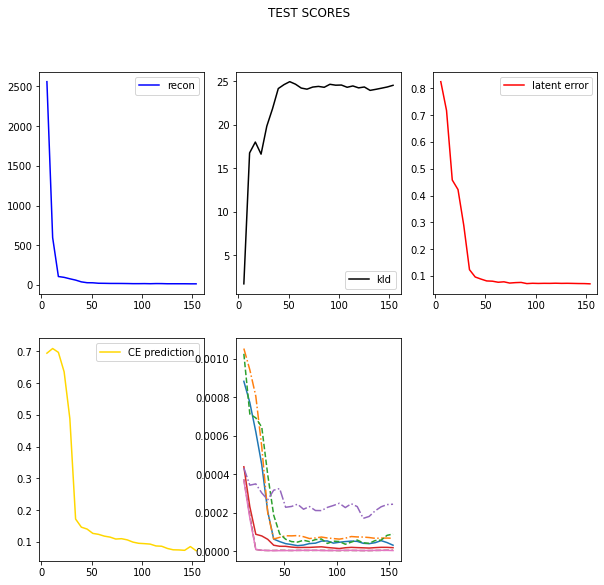

In [4]:
#Choose the path where results are stored
path='glance_25/'

# Choose VAE for GlanceNet base architecture(that includes reconstruction + kld)3
# otherwise CBNM for Concept Bottleneck Models
plot_test_scores(path, kind='VAE', n_latents=7)

In [30]:
# Load the disentanglement scores from test set
with open('glance_25/eval_results/evaluation_results.json') as file_to_read:
    dci_dict = json.loads(file_to_read.read())    

# Load predictions
with open('glance_25/eval_results/downstream_obtained.npy', 'rb') as npy:
    epoch = np.load(npy)
    y_test = np.load(npy)
    y_pred = np.load(npy)
    
y_test=(y_test.reshape(-1,1))
y_pred=(y_pred.reshape(-1,1))
# Use sklearn to evaluate results
mat = classification_report(y_test, y_pred, output_dict=True)
# just look at accuracy
acc = mat['accuracy']
print()
print('Accuracy score:', acc)

print('Disentanglement score:', dci_dict['disentanglement'])
print('Explicitness score:', dci_dict['informativeness_test'])


Accuracy score: 0.9662928974804518
Disentanglement score: 0.6769553677785891
Explicitness score: 0.81996
